# Visualisierung eines Convolutional Neural Network

## Setup
1. Führe alle Imports in durch und installiere ggf. fehlende Pakete
2. Führe den zweiten Setup Abschnitt aus, sodass alle nötigen Funktionen erstellt werden
3. Führe den dritten Setup Abschnitt aus, sodass alle Daten geladen und bearbeitet werden 

### 1. Import

In [1]:
import sys
assert sys.version_info >= (3, 5)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
assert tf.__version__ >= "2.0"

import numpy as np
import os

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

### 2. Funktionen

In [2]:
def visualize_model(model, layer_number, input_image):
    if layer_number == 0:
        plt.figure(figsize = (2,2))
        plt.imshow(input_image, cmap="gray")
        plt.suptitle('Input Image')
        plt.axis('off')
        plt.show()
    
    layer = model.layers[layer_number]
    
    if not isinstance(layer, keras.layers.Conv2D):
        raise ValueError(f"Layer {layer_number} is not a Conv2D layer")

    if layer_number < 0 or layer_number >= len(model.layers):
        raise ValueError(f"Layer number must be between 0 and {len(model.layers) - 1}")
    
    filters, biases = layer.get_weights()

    input_image = tf.reshape(input_image, [1, 28, 28, 1])
    
    amount_filters = filters.shape[-1]
    amount_kernels = filters.shape[-2]
    
    fig, axes = plt.subplots(amount_filters, amount_kernels, figsize=(12, 12))
    for i in range(amount_filters):
        for j in range(amount_kernels):
            ax = axes[i, j] if amount_kernels > 1 else axes[i]
            ax.imshow(filters[:,:,j,i], cmap='gray')
            ax.axis('off')

            weight_values = filters[:,:,j,i]
            for k in range(weight_values.shape[0]):
                for l in range(weight_values.shape[1]):
                    ax.text(l, k, f'{weight_values[k, l]:.2f}', color='red', fontsize=8, ha='center', va='center')
    plt.tight_layout()
    plt.show()
    
    feature_map_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer.output)

    feature_maps = feature_map_model.predict(input_image)
    
    # Plot the feature maps
    n_feature_maps = feature_maps.shape[-1]
    fig, axes = plt.subplots(1, n_feature_maps, figsize=(12, 12))
    for i in range(n_feature_maps):
        ax = axes[i]
        ax.matshow(feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_predictions(images, labels):
    y_pred = model.predict(images)
    indices = np.arange(len(images))
    np.random.shuffle(indices)
    test_images_shuf, y_pred_shuf, test_labels_shuf = images[indices], y_pred[indices], labels[indices]
    f, axarr = plt.subplots(3,6, figsize=(12,6))
    for IMG_INDEX, ax in enumerate(axarr.flat):
        ax.imshow(test_images_shuf[IMG_INDEX], cmap=plt.cm.binary)
        output = 1 if y_pred_shuf[IMG_INDEX][0] > 0.5 else 0
        ax.set_xlabel("Predicted: " + str(output))
        ax.set_title("Label: " + str(test_labels_shuf[IMG_INDEX]), fontsize=10)
    plt.tight_layout()
    plt.show()

### 3. Daten (MNIST Dataset)

In [3]:
(train_img, train_lab), (test_img, test_lab) = keras.datasets.mnist.load_data()

train_index = np.where((train_lab == 0) | (train_lab == 1))
train_images = train_img[train_index]
train_labels = train_lab[train_index]

test_index = np.where((test_lab == 0) | (test_lab == 1))
test_images = test_img[test_index]
test_labels = test_lab[test_index]

train_images, test_images = train_images / 255.0, test_images / 255.0

## Visualisierung
Definiere dein eigenes CNN Modell im unteren Abschnitt. Füge beliebige Convolutional Layers mit einer beliebigen Anzahl von Filtern und einer beliebigen Filter Size ein. Weiterhin kann man dazwischen beliebig Pooling Layers einfügen 

Wichtig! - Nach jeder Änderung des Modells muss das Modell neu kompiliert und trainiert werden

### Ideen zum rumspielen
1. Wie verändern sich die Feature Maps, wenn man die Grösse oder die Anzahl der Filter verändert?
2. Wie verändern sich die Feature Maps, wenn man eine Pooling Layer vor der Convolutional Layer einfügt?
3. Wie verändern sich die Filter im verlaufe des trainging Prozess? (Führe *fit* mit einer epoch aus und schaue dir die Filters an. Führe *fit* danach nochmal aus und schaue, wie sich die Filter verändert haben)

In [4]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    
    #Definiere hier deine Convolutional Layers und Pooling Layers
    keras.layers.Conv2D(filters=3, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=4, kernel_size=3, activation="relu", padding="same"),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 4)      │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 927 (3.62 KB)

 Trainable params: 927 (3.62 KB)

 Non-trainable params: 0 (0.00 B)

Compile und trainiere dein Modell 

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images,test_labels))

Epoch 1/3
396/396 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9391 - loss: 0.2316 - val_accuracy: 0.9976 - val_loss: 0.0052
Epoch 2/3
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9976 - loss: 0.0055 - val_accuracy: 0.9991 - val_loss: 0.0033
Epoch 3/3
396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9995 - val_loss: 0.0028


Visualisert die Predictions des Models im Test Data Set

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


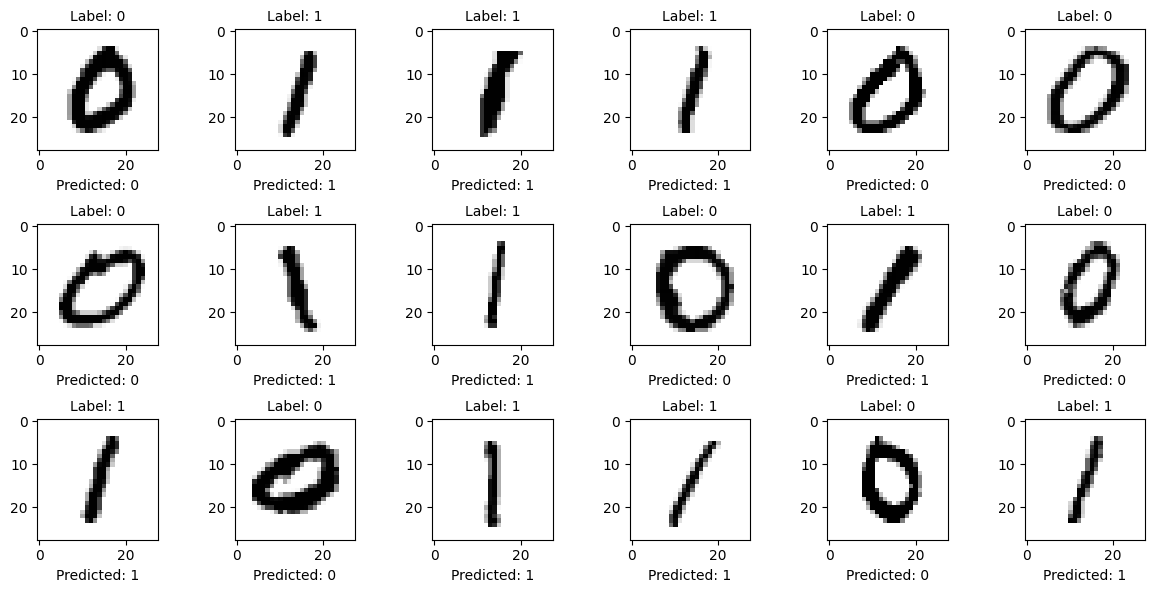

In [7]:
visualize_predictions(test_images, test_labels)

Diese Funktion kann jeweils ein Layer visualisieren. Gebe die Layer und ein beliebiges Bild aus dem Test Data Set ein um die jeweiligen Filter und Feature Maps zu visualisieren. Stelle sicher, dass nur Conv2D Layers eingegeben werden. (Pooling layers können nicht visualisiert werden)

Syntax: *visualize_model(model, layer number, image)*

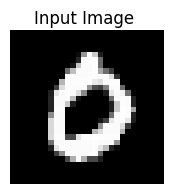

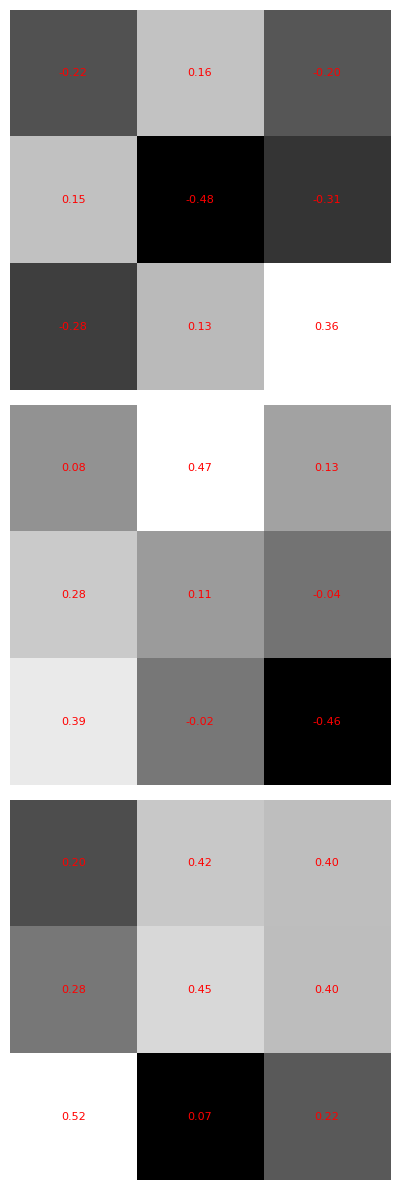

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


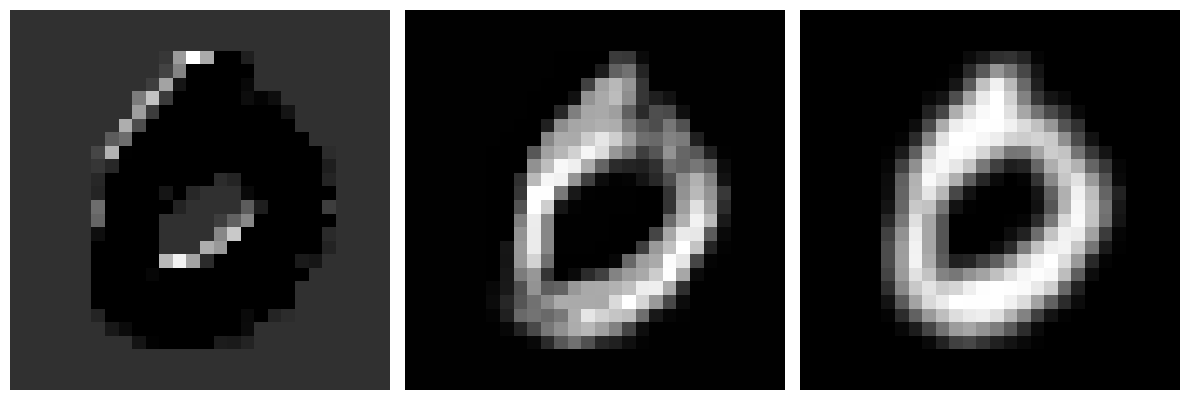

In [8]:
image = test_images[1] #Beliebiges Index zwischen 0 und 2114
visualize_model(model, 0, image)

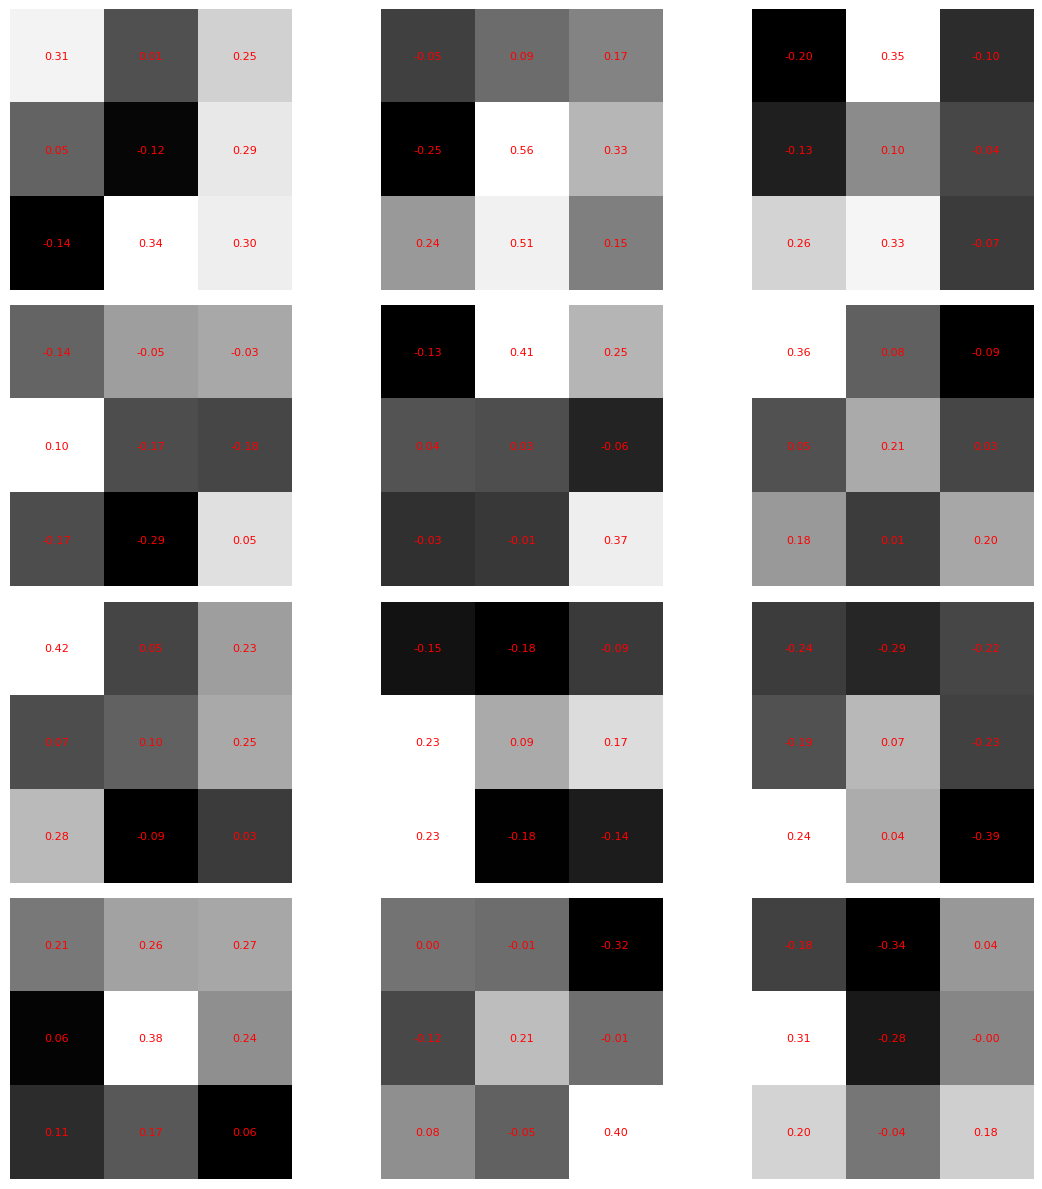

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


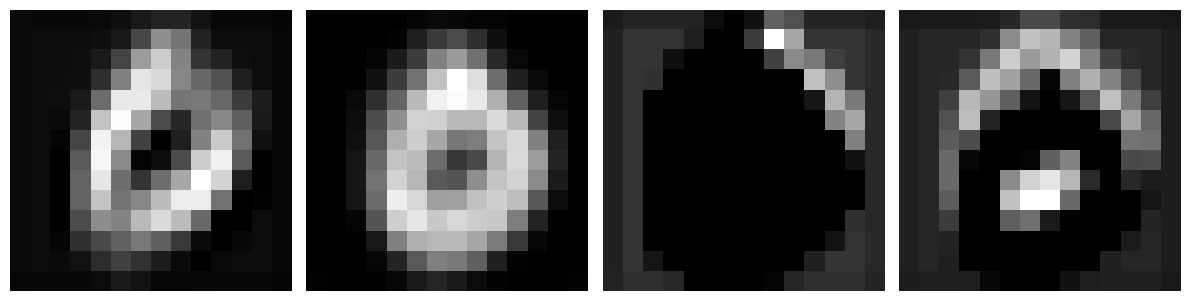

In [9]:
visualize_model(model, 2, image)

Füge hier beliebig viele Funktionen ein, um mehr Layers in deinem Modell zu visualisieren

In [ ]:
#visualize_model(model, 3, image)